선형모델
==
다루는 내용
--
- 머신러닝 개념
- 경사하강법
- 선형회귀, 회귀직선
- 선형분류, 분류경계
- 컨퓨전 매트릭스, 분류성능,ROC, AUC

## 실습 데이터 생성

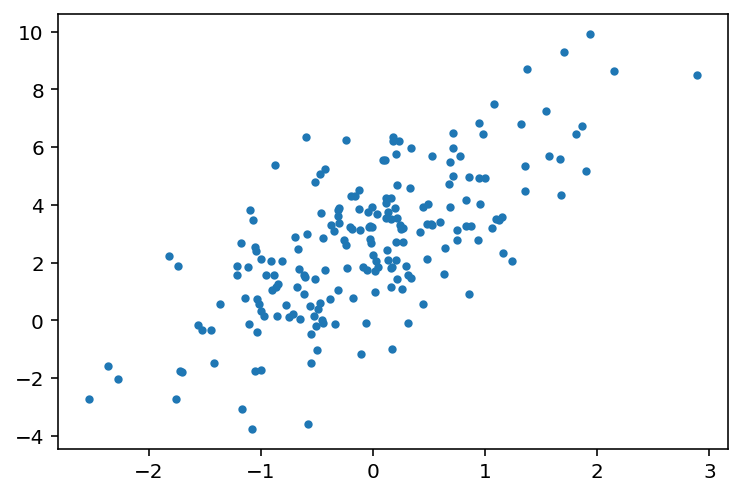

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

n_samples = 200
x = np.random.randn(n_samples)

# 계수 및 절편
w = 2
b = 3
# 노이지 
y = w*x + b + np.random.randn(n_samples)*2
plt.scatter(x,y, s=10)

## 선형회귀 모델 사용

In [2]:
from sklearn.linear_model import LinearRegression
leg = LinearRegression()
leg.fit(x.reshape(-1,1), y)

print(leg.coef_)
print(leg.intercept_)

[1.95392423]
2.7851499270080207


In [3]:
leg.coef_[0]

1.9539242310058054

In [4]:
leg.intercept_

2.7851499270080207

## 회귀직선

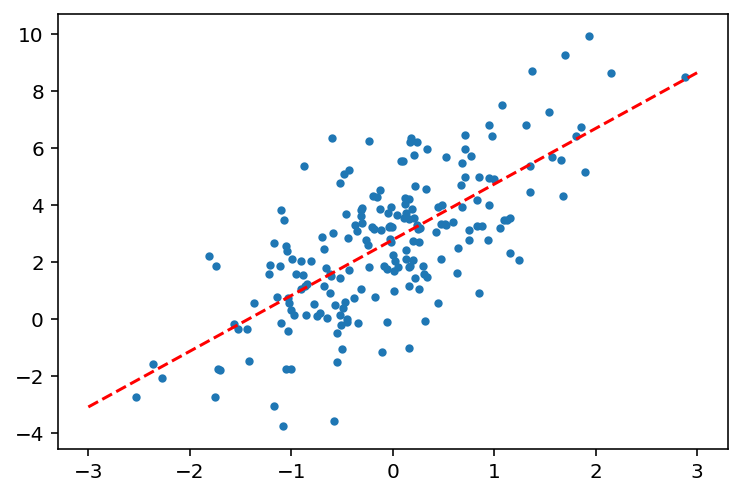

In [5]:
a, b = leg.coef_, leg.intercept_
xs = np.linspace(-3, 3, 2)
plt.plot(xs, a*xs + b, "r--")
plt.scatter(x,y, s=10)

## 남여 키-몸무게-성별 예측

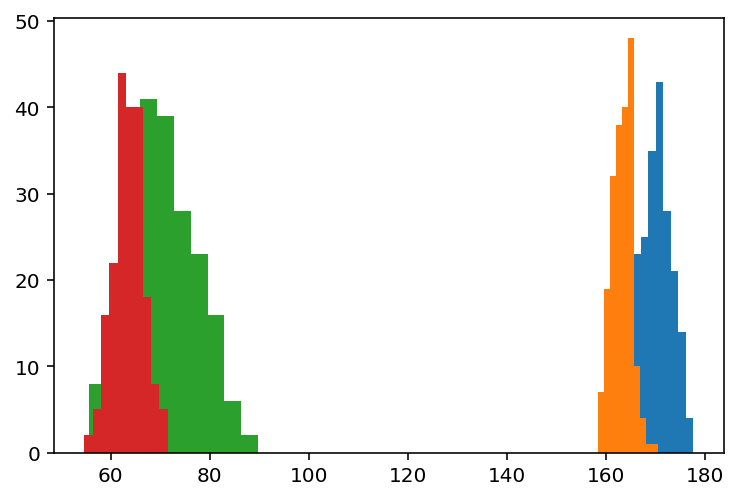

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split

n_samples = 200 #  사람수 남여, 각각 200명 (총 400명)
x1 = 3*np.random.randn(n_samples) + 170 # 남성의 키
x2 = 2*np.random.randn(n_samples) + 163 # 여성의 키

y1 = 2*x1 - 270 + 3*np.random.randn(n_samples) # 남성 몸무게
y2 = 1*x2 - 100 + 2*np.random.randn(n_samples) # 여성 몸무게
plt.hist(x1)
plt.hist(x2)

plt.hist(y1)
plt.hist(y2)
plt.show()

In [174]:
p = [1,2,3,4,5,6,7,8,9,10]
q = [11,12,13,14,15,16,17,18,19,20]
p_train, p_test, q_train, q_test = train_test_split(p, q, 
            test_size=0.2, random_state=90)                                             
p_train, p_test, q_train, q_test

([1, 7, 6, 10, 5, 8, 4, 3], [9, 2], [11, 17, 16, 20, 15, 18, 14, 13], [19, 12])

In [130]:
# 남자 데이터만 사용하여 키로부터 몸무게 예측 (x1  --> y1 예측하는 모델)
X_train, X_test, y_train, y_test = train_test_split(x2, y2, random_state=42)
model = LinearRegression()  # (1) 모델 생성
model.fit(X_train.reshape(-1,1), y_train) # (2) 모델 학습

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [131]:
# R-square 점수
model.score(X_test.reshape(-1,1), y_test) # (3) 채점

0.6147019241283215

### 연습
- R2 가 0.9이상이 되도록 남성의 몸무게 생성 코드를 수정
- 여성 데이터만 사용하여 키로부터 몸무게 예측 (x2  --> y2 예측하는 모델) R2? (톡방에..)

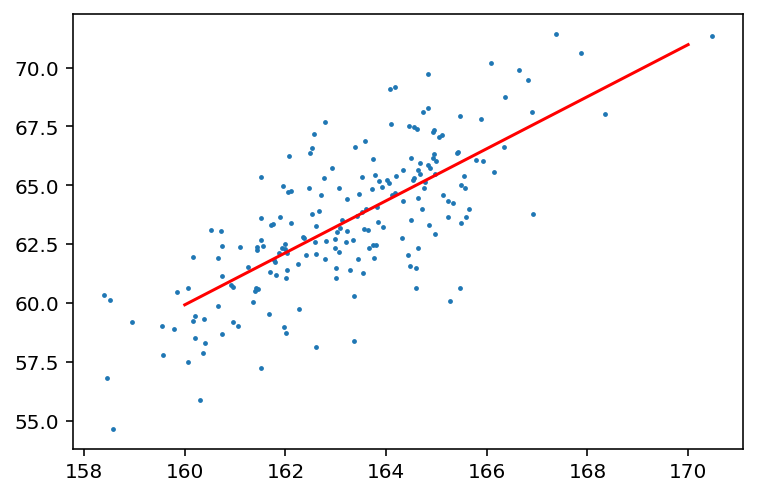

In [135]:
xs = np.linspace(160,170,2)
ys = xs * model.coef_[0] + model.intercept_
plt.scatter(x2, y2, s=2)
plt.plot(xs, ys, c='r')

## 셀 나누기는 shift ctrl "-"

## 남여 데이터를 합친 데이터 (400명)

In [235]:
x = np.concatenate((x1, x2)) # np.hstack((x1,x2))
y = np.concatenate((y1, y2))

In [236]:
x.shape, y.shape

((400,), (400,))

In [237]:
X_train, X_test, y_train, y_test = train_test_split(x, y)
leg1 = LinearRegression()
leg1.fit(X_train.reshape(-1,1), y_train)
leg1.score(X_test.reshape(-1,1), y_test)

0.7426463438245763

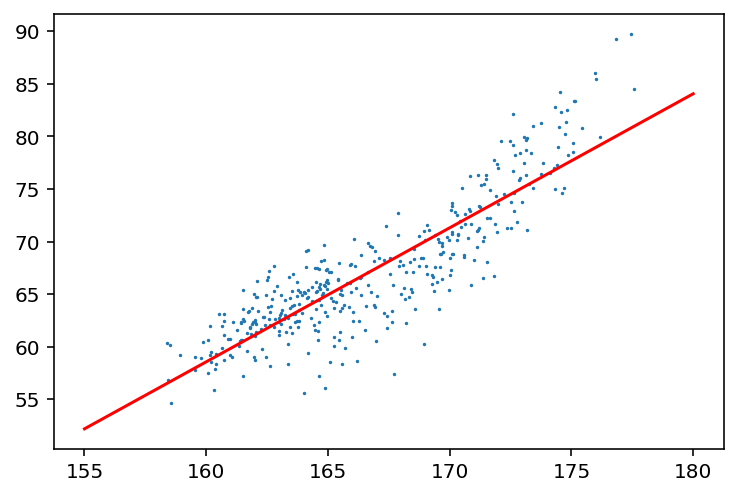

In [238]:
xs = np.linspace(155,180,2)
ys = xs * leg1.coef_[0] + leg1.intercept_
plt.scatter(x,y, s=0.5)
plt.plot(xs, ys, c='r')

In [239]:
# 남성을 0으로 여성을 1로 인코딩
X1 = pd.DataFrame({'height':x1, 'sex':1})
X2 = pd.DataFrame({'height':x2, 'sex':0})
X = pd.concat([X1, X2], ignore_index=True)
X

,height,sex
0,169.536044,1
1,168.928784,1
2,171.515347,1
3,172.977111,1
4,175.988038,1
...,...,...
395,164.084509,0
396,163.070828,0
397,164.993198,0
398,160.169533,0


In [240]:
# sex = [0]*n_samples + [1]*n_samples ; sex

In [241]:
# X = pd.DataFrame(x)
# X['sex'] = sex
# X

In [242]:
np.random.seed(90)
X_train, X_test, y_train, y_test = train_test_split(X, y)
leg = LinearRegression()
leg.fit(X_train, y_train)
leg.score(X_test, y_test)

0.8521058935389763

## 성별을 고려하여 성능이 개선됨

In [243]:
print(leg.coef_)
print(leg.intercept_)

[ 1.73551931 -5.00003896]
-219.8419565123222


In [244]:
a1, a2 = leg.coef_[0], leg.coef_[1]
b = leg.intercept_

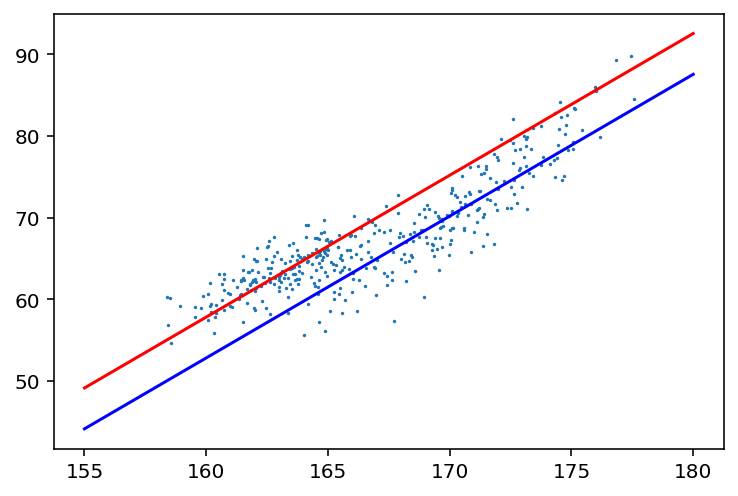

In [245]:
xs = np.linspace(155,180,3)
plt.scatter(x,y, s=0.5)
# 남성의 경우
ys = a1*xs + a2*1 + b
plt.plot(xs, ys, c='b')
# 여성의 경우
ys = a1*xs + a2*0 + b
plt.plot(xs, ys, c='r')

### 남성을 0으로 여성을 1로 인코딩하면 결과가 달라지나?

# 선형 분류

In [246]:
X["weight"] = y
X[:10]

,height,sex,weight
0,169.536044,1,70.239162
1,168.928784,1,71.015170
2,171.515347,1,72.236251
3,172.977111,1,73.797518
4,175.988038,1,85.493235
5,174.304887,1,75.040772
6,174.857338,1,78.259009
7,174.337486,1,82.793694
8,168.197798,1,62.249420
9,172.872931,1,76.067337


In [247]:
y = X["sex"] ;y[:5]

0    1
1    1
2    1
3    1
4    1
Name: sex, dtype: int64

In [248]:
X = X.drop(["sex"], axis=1, errors='ignore');X[:5]

,height,weight
0,169.536044,70.239162
1,168.928784,71.015170
2,171.515347,72.236251
3,172.977111,73.797518
4,175.988038,85.493235


In [249]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sc = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_sc, y)
clf = SGDClassifier() # (1) 모델 정의
clf.fit(X_train, y_train) #(2) 학습
clf.score(X_test, y_test) # accuracy

0.96

In [250]:
y_pred = clf.predict(X_test) # (3) 모델 사용

In [251]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

- Precision  = 모델이 옳다고 한 것이 실제로 옳은 비율     TP / ( TP + FP ) 
- Recall =  실제 정답인 것들 중, 모델이 정답이라고 예측한 것    TP / TP+FN
- f1-score = Precision과 Recall의 조화평균  (2 x  Precision x Recall ) /  (Precision + Recall)
- support는 이 모델에서 응답한 샘플의 수이다

In [252]:
confusion_matrix(y_test, y_pred)

array([[54,  4],
       [ 0, 42]])

In [253]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        58
           1       0.91      1.00      0.95        42

    accuracy                           0.96       100
   macro avg       0.96      0.97      0.96       100
weighted avg       0.96      0.96      0.96       100



In [254]:
clf.coef_, clf.intercept_

(array([[ 8.34119374, -4.57795195]]), array([0.58464398]))

In [255]:
a1, a2, b = clf.coef_[0][0], clf.coef_[0][1], clf.intercept_

In [256]:
m1, m2 = sc.mean_[0], sc.mean_[1]
s1, s2 = sc.scale_[0], sc.scale_[1]

In [257]:
m1,m2, s1, s2

(166.79039016177327, 67.22509471949334, 4.3644282324043315, 6.390829034789754)

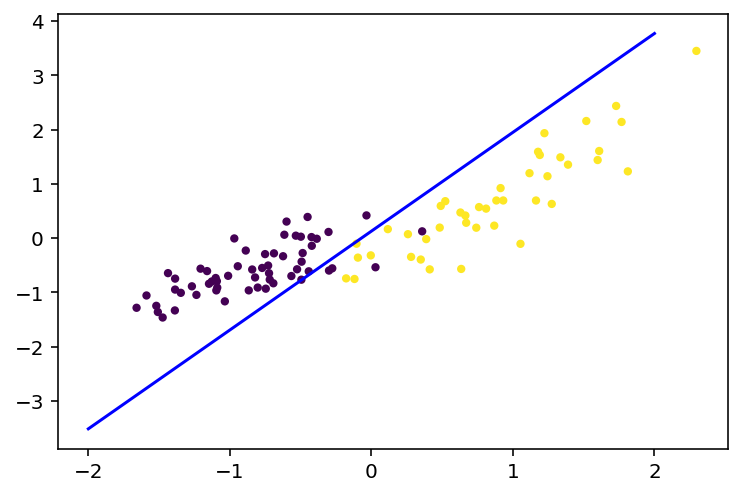

In [258]:
xs = np.linspace(-2,2,2)
plt.scatter(X_test[:,0],X_test[:,1], s=10, c=y_test)
ys = xs * (-a1/a2) - b/a2
plt.plot(xs, ys, c='b')

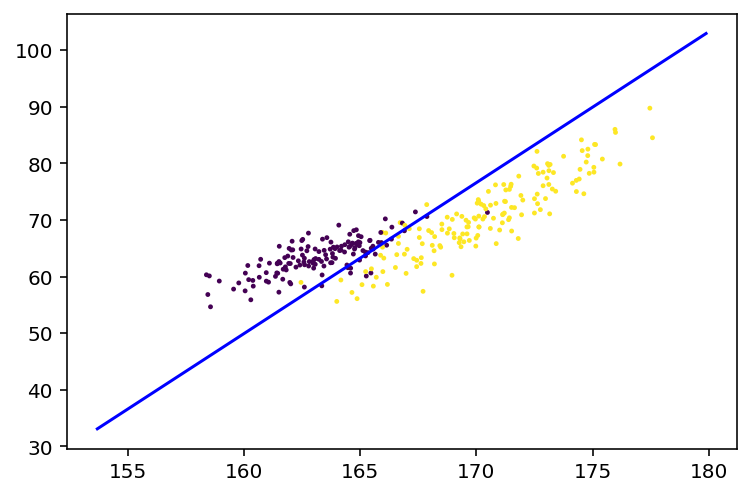

In [259]:
xs = np.linspace(-3,3,3)
plt.scatter(X_train[:,0]*s1+m1,X_train[:,1]*s2+m2, s=2, c=y_train)
ys = xs * (-a1/a2) - b/a2
plt.plot(xs*s1+m1, ys*s2+m2, c='b')

In [260]:
scores = clf.decision_function(X_test)

In [261]:
scores

array([-3.18495578, -2.20398977,  7.33100162,  3.36958908,  5.89016469,
        3.9427599 ,  1.9565434 , -6.63915853, -7.56148797, -1.94035076,
       -4.91338506,  0.79721142, -3.68934913,  0.18146998,  3.9794661 ,
       -5.01441875,  2.49571854, -2.46021063, -7.37370231, -5.22290618,
       -5.15963114, -4.14024015,  3.49597149, -1.61874627,  3.673003  ,
       -6.31573136,  5.1797429 , -4.82830021, -7.46454015, -1.53627907,
        5.30541303,  4.87832556,  6.66398508,  4.31292405, -4.88793789,
       -4.07285177,  4.85720682,  3.85620045, -2.57938635, -6.90257057,
        4.42577798, -5.76423375, -3.87013285, -2.48336415, -1.3795352 ,
       -3.79013232,  0.83102147, -3.08963638, -4.89212954,  4.21686126,
        6.77523965, -6.02766606,  1.82369985,  4.90624008,  5.97516314,
       -0.30310797, -5.92341562,  4.51016202, -5.76840312, -1.90253083,
        7.11373002,  6.6607978 ,  4.77452132, -3.03134497, -1.3715664 ,
        8.48072762,  2.4086162 , -0.03081294, -4.33002414, -4.32

In [262]:
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, _ = roc_curve(y_test, scores)
roc_auc = auc(fpr, tpr)

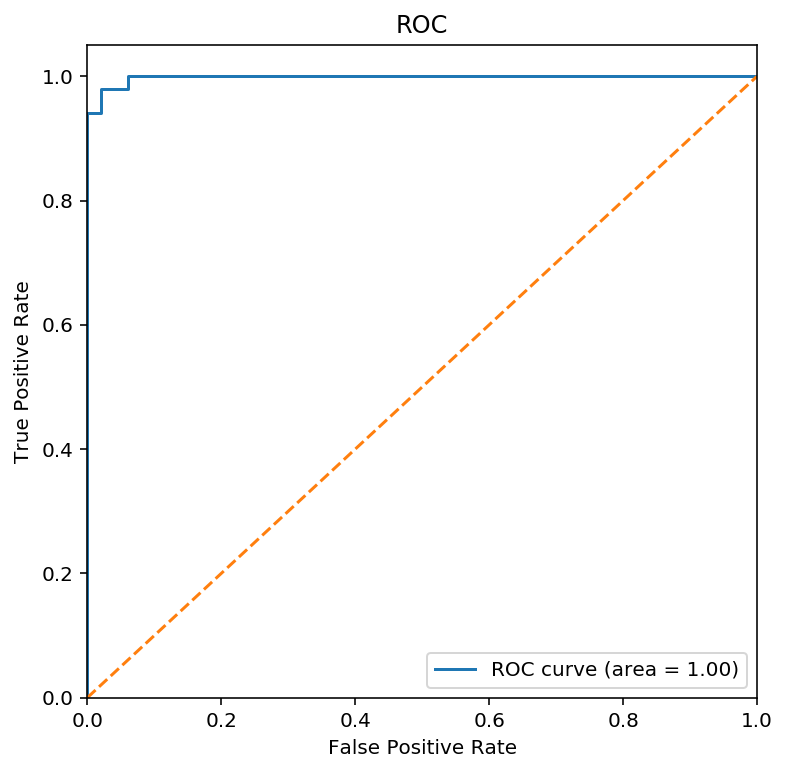

In [36]:
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")

## (참고) 랜덤 포레스트를 사용하는 경우

In [0]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=20) # (1)
clf.fit(X_train, y_train) #(2)
clf.score(X_test, y_test)

0.95

## (참고) ROC 성능 비교

In [264]:
# 평가 점수 score 임의로 20명을 배정, 랭킹 평가
y_score = np.linspace(99, 60, 20).round(1)
print(y_score)

[99.  96.9 94.9 92.8 90.8 88.7 86.7 84.6 82.6 80.5 78.5 76.4 74.4 72.3
 70.3 68.2 66.2 64.1 62.1 60. ]


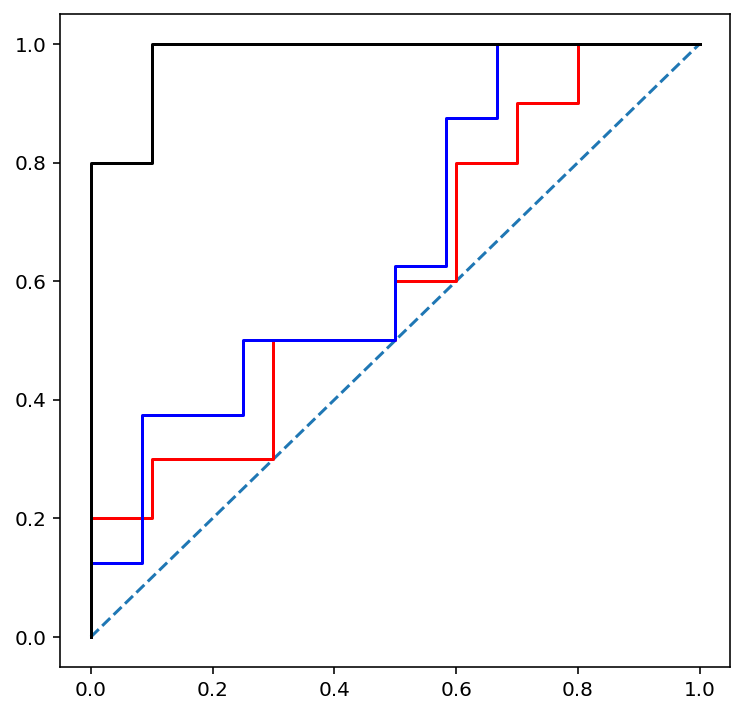

In [266]:
y_real=[[1,1,0,1,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0,0],
        [1,0,1,1,0,0,1,0,0,0,1,0,1,1,0,1,0,0,0,0],
        [1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0]]

plt.figure(figsize=(6,6))    
fpr = dict()
tpr = dict()
plt.plot([0, 1], [0, 1], linestyle='--')

my_color = ['r', 'b', 'k']
for i in range(3):
    fpr, tpr, _ = roc_curve(y_real[i], y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, c=my_color[i])